<a href="https://colab.research.google.com/github/AisIzmailova/Aisulu-Izmailova/blob/master/DL_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Introduction to neural network classification with Tensorflow

A classification is where you try to classify something as one thing or another.
* Binary classification
* Multiclass classification
* Multilabel classification

📖 Read: A Recipe for Training Neural Networks -  http://karpathy.github.io/2019/04/25/recipe/#:~:text=The%20recipe%201%201.%20Become%20one%20with%20the,3%203.%20Overfit%20...%204%204.%20Regularize%20

##Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

#Make 1000 examples
n_samples = 1000

#Create circles
X,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state = 42)

In [ ]:
#Check features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
#Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
#Visualize data
import pandas as pd
circles = pd.DataFrame({"X0": X[:,0], "X1": X[:,1], "label":y })
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


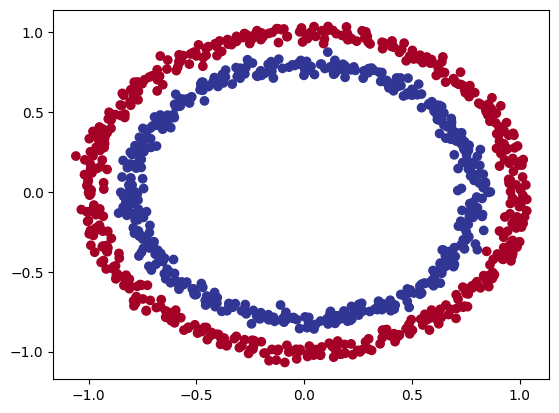

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

Try: https://playground.tensorflow.org/

##Input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
len(X), len(X_train), len(y), len(y_train)

(1000, 800, 1000, 800)

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

#1.Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2.Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#3.Fir the model
model_1.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
#4.Evaluate the model
model_1.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.6966 - accuracy: 0.4750


[0.6965691447257996, 0.4749999940395355]

In [ ]:
#5.Visualize
import numpy as np
def plot_decision_boundary(model,X,y):
  #Define axis boundaries fo the plot and create a meshgrid
  x_min, x_max = X[:,0].min() -0.1, X[:,0].max() +0.1
  y_min, y_max = X[:,0].min() -0.1, X[:,0].max() +0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  #Create X values
  x_in = np.c_[xx.ravel(), yy.ravel()] #stack 2D arrays together

  #Make predicitions
  y_pred = model.predict(x_in)

  #Check for multi-class
  if len(y_pred[0])>1:
    print("doing multiclass classification")
    #We have to reshape our prediciton to get them readu for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  #Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 1s 1ms/step
doing binary classification


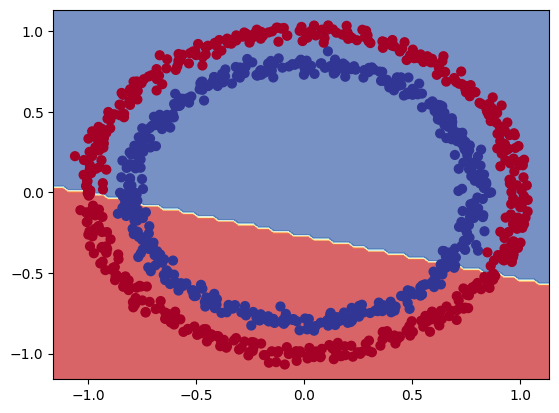

In [ ]:
plot_decision_boundary(model=model_1, X=X, y=y)

📖 Read:
* http://cs231n.stanford.edu/
* https://github.com/GokuMohandas/Made-With-ML

In [ ]:
#Let's see if our model can be used for a regression problem
tf.random.set_seed(42)

#Create some regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) #y=X+100

#Split regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

#The BinaryCrossentropy() should be changed

#1.Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2.Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

#3.Fit our model to regression data
model_2.fit(tf.expand_dims(X_reg_train,axis=1), y_reg_train, epochs = 100, verbose=0)

In [ ]:
#4.Evaluate the model
model_2.evaluate(X_reg_test,y_reg_test)

2/2 [==============================] - 0s 8ms/step - loss: 61.0690 - mae: 61.0690


[61.06902313232422, 61.06902313232422]

2/2 [==============================] - 0s 6ms/step


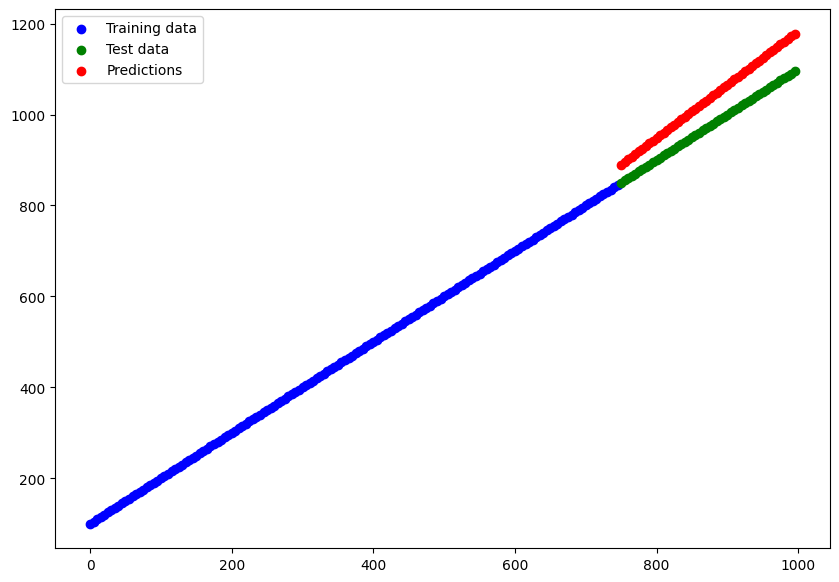

In [ ]:
#5.Visualize
y_reg_preds = model_2.predict(X_reg_test)
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b",label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g",label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r",label="Predictions")
plt.legend()

##The missing piece - Non-liearity

In [ ]:
tf.random.set_seed(42)

#1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.linear)

 ])

#2. Compile the model
model_3.compile(loss = "binary_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics = ["accuracy"])

#3. Fit the model
model_3.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
#4.Evaluate the model
model_3.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 4.8224 - accuracy: 0.4500


[4.8223876953125, 0.44999998807907104]

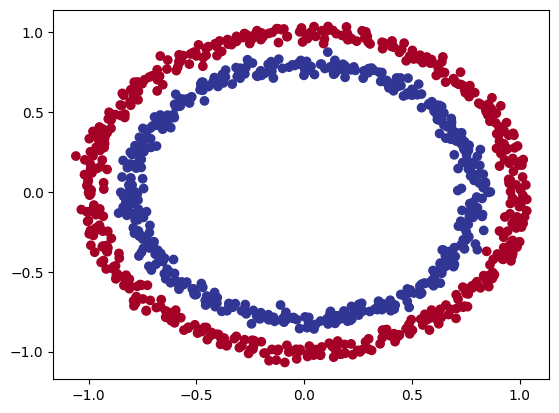

In [ ]:
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classification


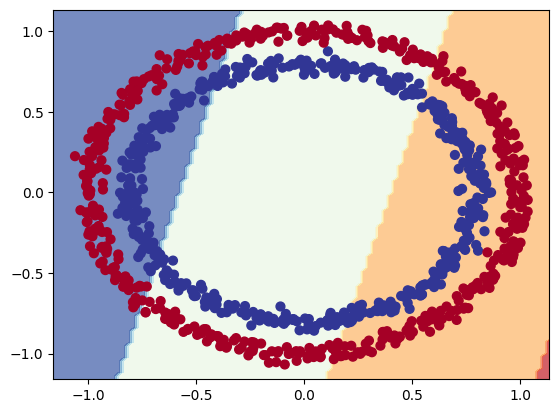

In [ ]:
plot_decision_boundary(model=model_3, X=X, y=y)

##Building neural network model with non-linear activation

In [ ]:
tf.random.set_seed(42)

#1. Create the model
model_4= tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.relu)
])

#2. Compile the model
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics = ["accuracy"])
#3. Fit the model
history = model_4.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
#4.Evaluate the model
model_4.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 5.9193 - accuracy: 0.4850


[5.9193243980407715, 0.48500001430511475]

313/313 [==============================] - 0s 1ms/step
doing binary classification


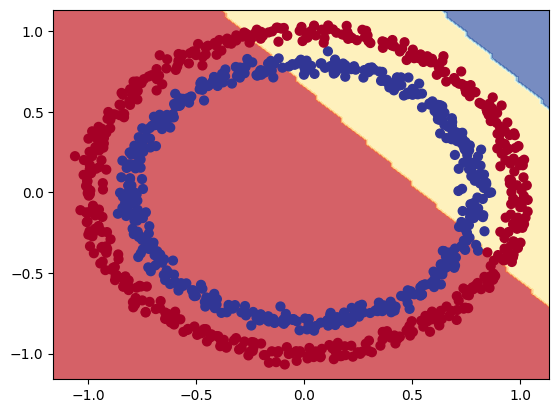

In [ ]:
#5.Visualize
plot_decision_boundary(model=model_4, X=X, y=y)

In [ ]:
tf.random.set_seed(42)

#1. Create the model
model_5= tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics = ["accuracy"])
#3. Fit the model
history = model_5.fit(X_train, y_train, epochs=250, verbose=0)

In [ ]:
#4.Evaluate the model
model_5.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.2000 - accuracy: 0.9450


[0.19998693466186523, 0.9449999928474426]

313/313 [==============================] - 1s 2ms/step
doing binary classification


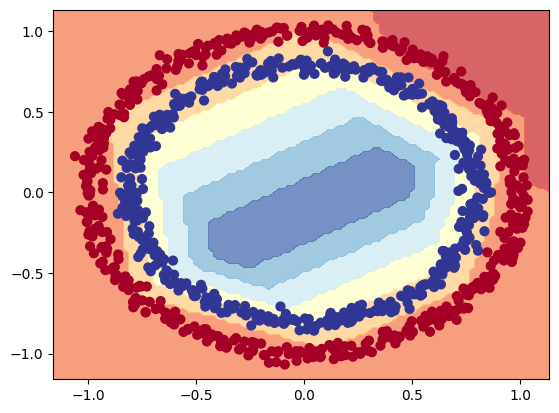

In [ ]:
#5.Visualize
plot_decision_boundary(model=model_5, X=X, y=y)

In [ ]:
tf.random.set_seed(42)

#1. Create the model
model_6= tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)
])

#2. Compile the model
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics = ["accuracy"])
#3. Fit the model
history = model_6.fit(X_train, y_train, epochs=250, verbose=0)

In [ ]:
#4.Evaluate the model
model_6.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0921 - accuracy: 0.9900


[0.09209086745977402, 0.9900000095367432]

313/313 [==============================] - 1s 2ms/step
doing binary classification


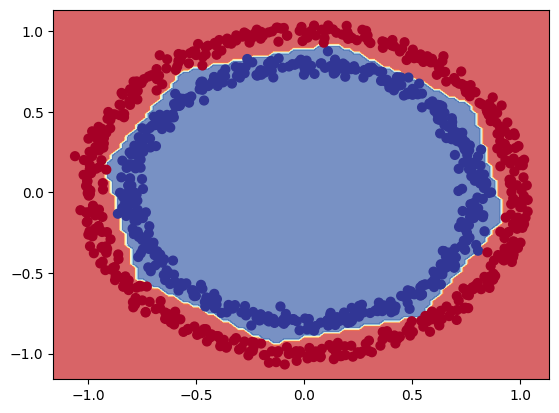

In [ ]:
#5.Visualize
plot_decision_boundary(model_6, X, y)

**Note:** The combination of linear and non-linear functions is one of the key fundamentals of neural networks.

Now wediscussed the concept of linear and non-linear function, let's see them in action.

In [ ]:
#Create a toytensor
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

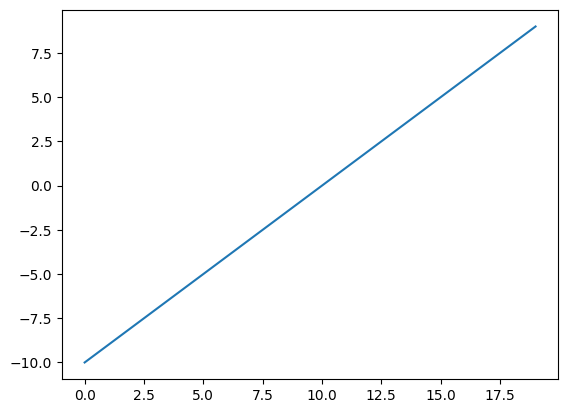

In [ ]:
#Visualize
plt.plot(A)

In [ ]:
#Let's start by replicating sigmoid
def sigmoid(x):
  return 1/(1+tf.exp(-x))

#Use the sigmoid function on the toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

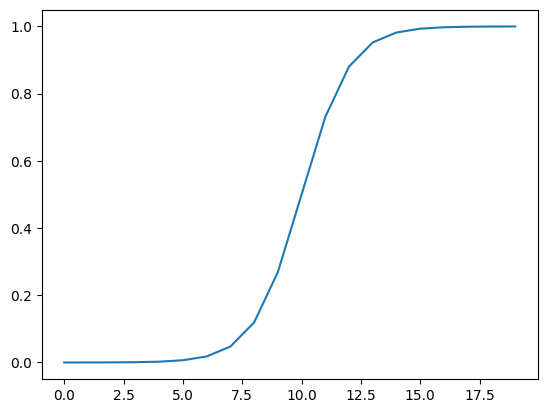

In [ ]:
#Plot the toy tensor transformed into sigmoid
plt.plot(sigmoid(A))

In [ ]:
#Let's recreate relu function
def relu(x):
  return tf.maximum(0,x)

#Use relu function on the toy tensor
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

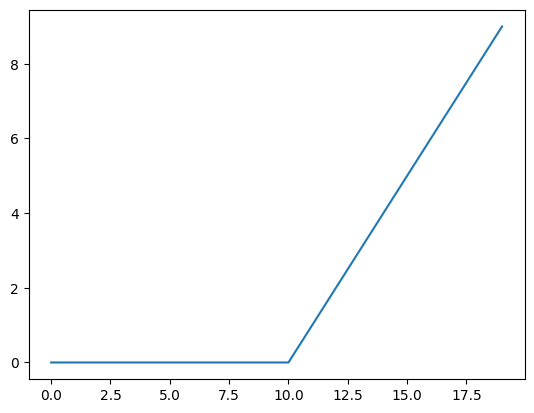

In [ ]:
#Plot the toy tensor transformed into relu
plt.plot(relu(A))

📖 Read: https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html

##Evaluating and improving classification model

In [ ]:
#Split data into train and test sets using indexing
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
#Let's recreate the model
tf.random.set_seed(42)

#1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

#2. Compile the model
model_7.compile(loss = tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics = ["accuracy"])
#3. Fit the model
history = model_7.fit(X_train, y_train, epochs=25, verbose=0)

In [ ]:
#4. Evaluat the model
model_7.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0262 - accuracy: 0.9800


[0.02618415094912052, 0.9800000190734863]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


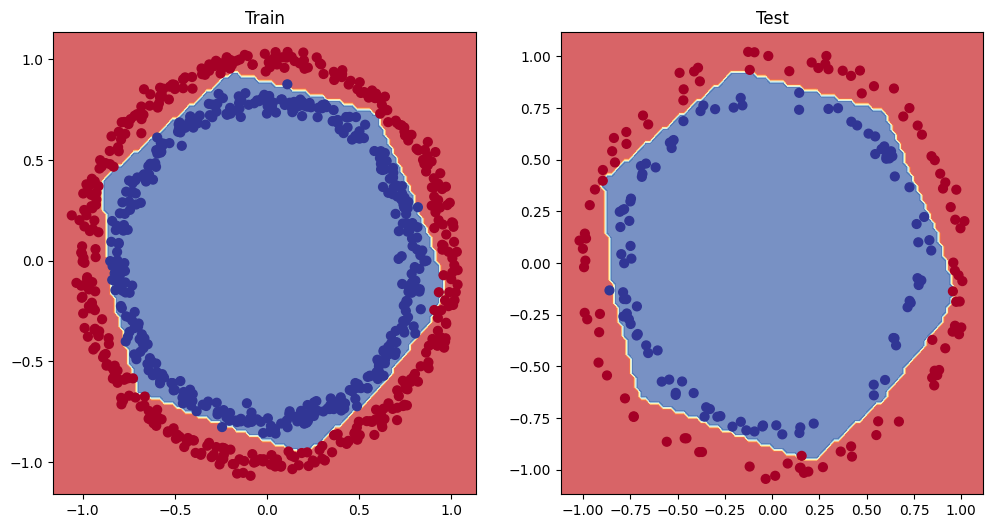

In [ ]:
#5. Visualize training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_7, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_7,X_test, y_test)
plt.show()

##Plot the loss (training) curves

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.175281,0.53000
1,0.170654,0.55750
2,0.169041,0.55500
3,0.165829,0.60875
4,0.161083,0.62625
5,0.155229,0.63375
6,0.148385,0.70875
7,0.138978,0.77500
8,0.127984,0.84250
9,0.114129,0.91125


Text(0.5, 1.0, 'Model_7 loss curves')

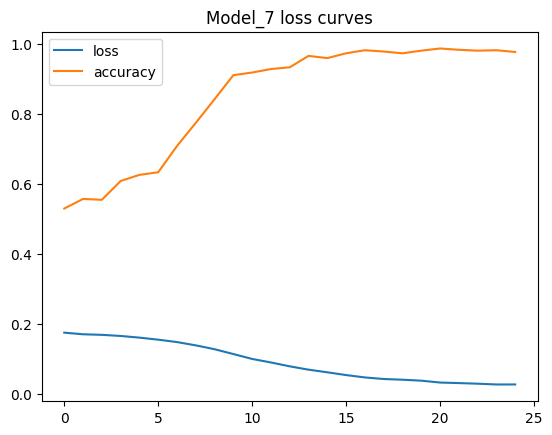

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("Model_7 loss curves")

**Note:** for many problems, the lossfucntion is going down which means the model is improving (the predictions it's making are getting closerto the ground truth labels).

##Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we are going to use the following steps:
* A learning rate **callback** - an extra piece of functionality you can add to your **while** training
* Another model
* A modified loss curves plot

In [ ]:
tf.random.set_seed(42)

#1. Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

#2. Compile the model
model_8.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = "Adam",
                metrics = ["accuracy"])

#Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

#3. Fit the model
history = model_8.fit(X_train, y_train, epochs=100, callbacks = [lr_scheduler], verbose=0)

<Axes: xlabel='epochs'>

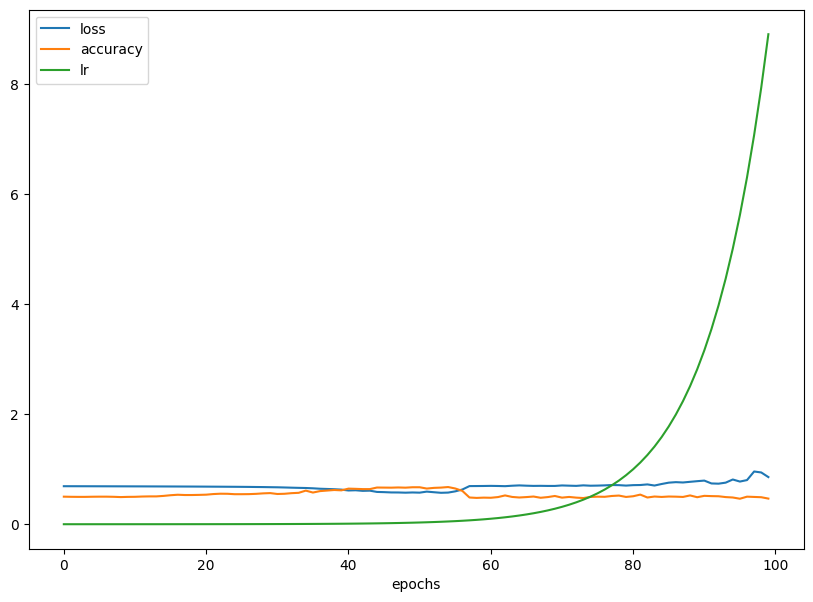

In [ ]:
#Checkout history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel = "epochs")

In [ ]:
#Plot the learning rate vs loss
lrs = 1e-4*(10**(tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

In [ ]:
len(lrs)

100

Text(0.5, 1.0, 'Learning rate vs. Loss')

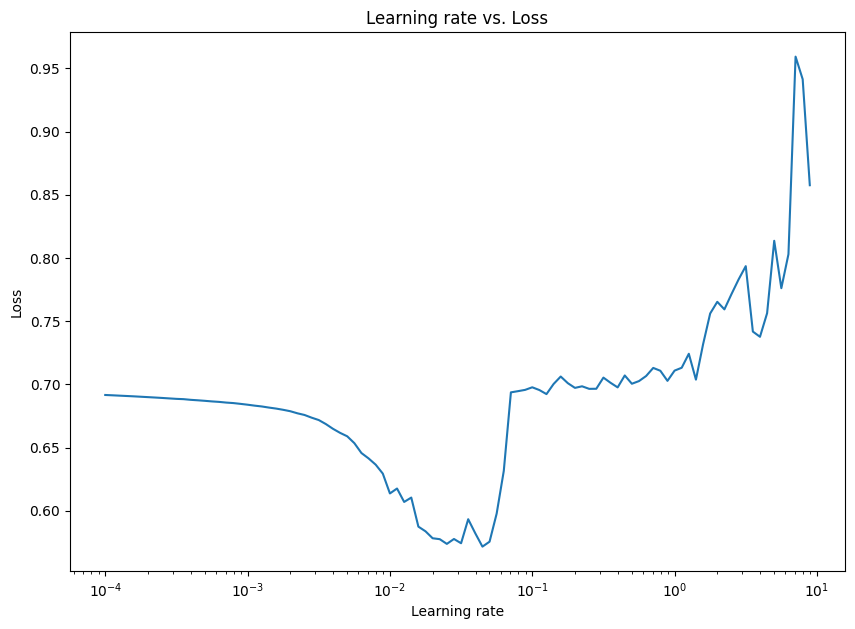

In [ ]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")

Methodology to find the ideal learning rate is to find the learning rate between the point where the loss decreases the fastest and the value 10 times smaller than that where the loss is the smallest.

In [ ]:
#Let's build a model with learning rate 0.02
tf.random.set_seed(42)

#1. Create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#2. Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=["accuracy"])

#3. Fit the model
history = model_9.fit(X_train, y_train, epochs=25, verbose=0)

In [ ]:
#4. Evaluate the model
model_9.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0886 - accuracy: 0.9750


[0.08864006400108337, 0.9750000238418579]

In [ ]:
model_7.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0262 - accuracy: 0.9800


[0.02618415094912052, 0.9800000190734863]

313/313 [==============================] - 1s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


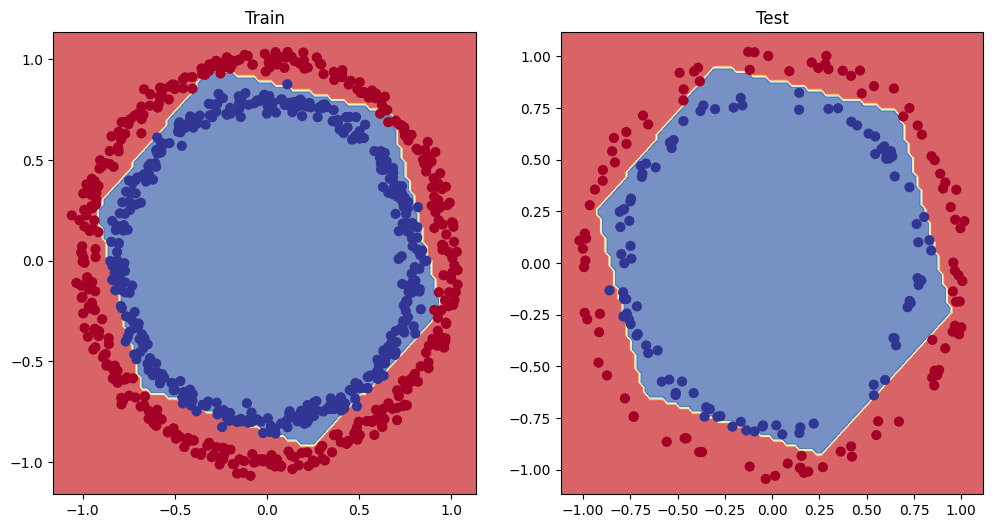

In [ ]:
#Plot the decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_9, X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_9,X_test,y_test)
plt.show()

##Classification evaluation methods

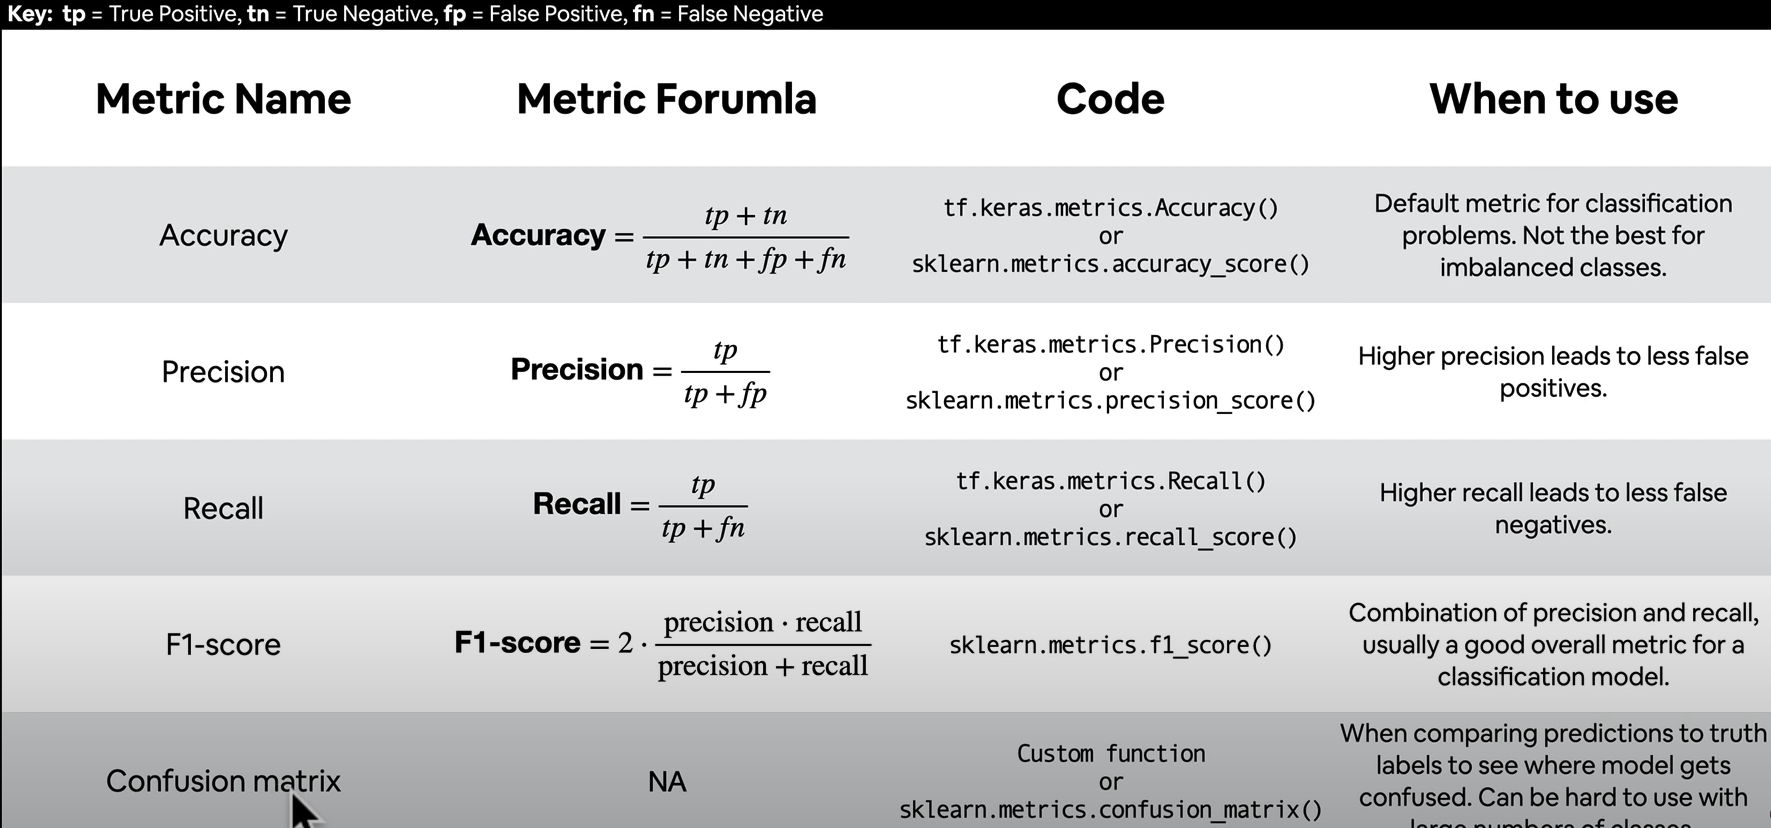

In [ ]:
#Accuracy
loss, accuracy = model_9.evaluate(X_test,y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0886 - accuracy: 0.9750
Model loss on the test set: 0.08864006400108337
Model accuracy on the test set: 97.50%


In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

#Make predictions
y_pred = model_9.predict(X_test)
#Convert the predictions array from prediction probability (standard output from the sigmoid(or softmax) activation functions)
y_pred = tf.round(y_pred)

#Create confusion matrix
confusion_matrix(y_test, y_pred)


7/7 [==============================] - 0s 2ms/step


array([[101,   0],
       [  5,  94]])

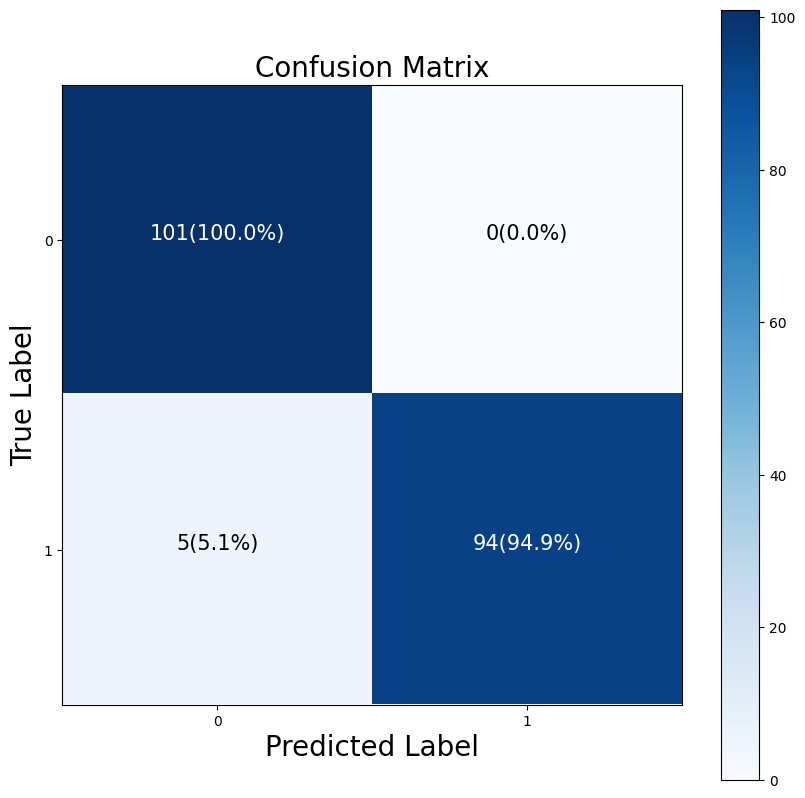

In [ ]:
#Adjust the plot_cofusion_matrix function from scikit-learn to use with tensorflow
import itertools

figsize = (10,10)

#Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype("float")/cm.sum(axis=1)[:,np.newaxis] #normalize confusion matrix
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize = figsize)
#Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

#Create classes
classes=False

if classes:
  labels = classes
else:
  labels= np.arange(cm.shape[0])

#Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

#Set x-axis to the bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

#Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

#Set threshold for different colors
threshold = (cm.max() + cm.min())/2.

#Plot the texrt one ach cell
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
  plt.text(j,i, f"{cm[i,j]}({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i,j] > threshold else "black",
           size=15)



##Working with multiclass classification

When you have more than two classes as an option, it's known as **multi-class classfification**.

We will use fashion-mnist dataset - https://www.tensorflow.org/tutorials/keras/classification

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#Data has already been sorted into training and test sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
#Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training labels:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
#Check the shape of a signle example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

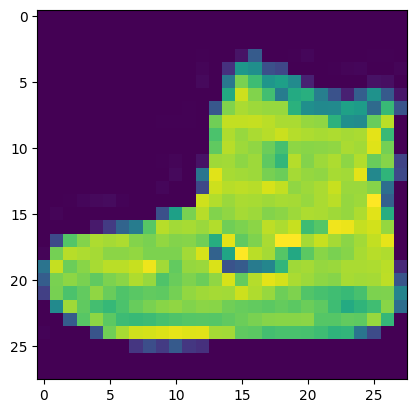

In [ ]:
#Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [ ]:
#Create lit of class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt","Sneaker", "Bag", "Ankle Boot"]
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

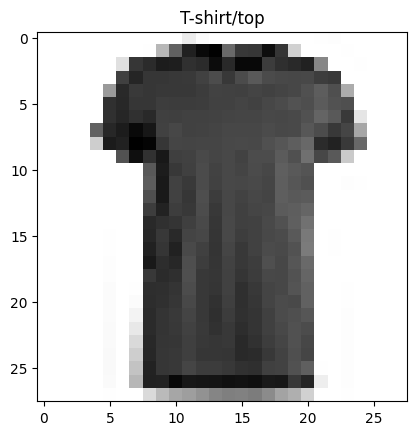

In [ ]:
#Plot an example image and its label
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

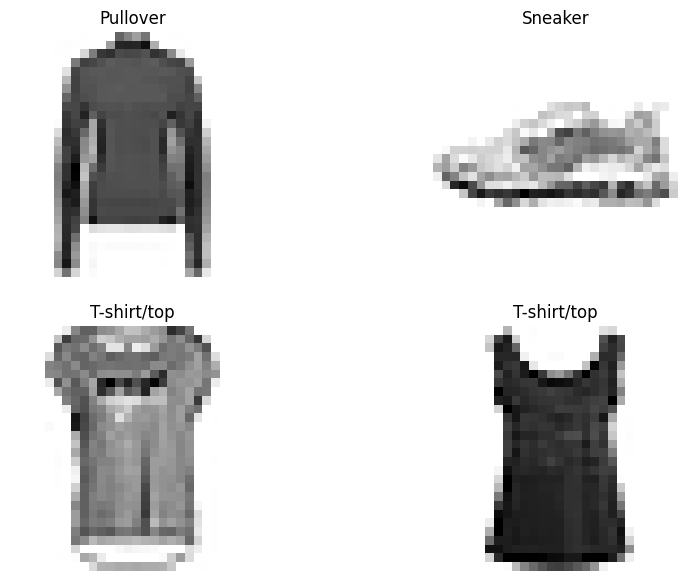

In [ ]:
#Plot multiple random images of fashion_mnist
import random
plt.figure(figsize=(10,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index= random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

##Build a multi-class classification model

Few things will be adjusted to build multi-class classification model:
* Input shape = 2**x28
* Output shape = 10 (one per class of clothing)
* Loss fucntion = tf.keras.CategoricalCrossEntropy()
* Output layer activation - Softmax (not sigmoid)

In [ ]:
#Data needs to be flattened from 28x28 to Nonex784
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [ ]:
#CategoricalCrossEntropy expects one-hot encoded values, if we are using integers we can use SparseCategoricalCrossEntropy
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
#Build a multi-class classification model
tf.random.set_seed(42)

#1. Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])

#2. Compile the model
model_10.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

#3. Fit the Model
non_norm_history = model_10.fit(train_data, train_labels, epochs = 10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.4677 - accuracy: 0.0985 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [ ]:
model_10.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 2.3027 - accuracy: 0.1000


[2.3026516437530518, 0.10000000149011612]

In [ ]:
#Build a multi-class classification model
tf.random.set_seed(42)

#1. Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])

#2. Compile the model
model_11.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

#3. Fit the Model
non_norm_history = model_11.fit(train_data,
                                tf.one_hot(train_labels, depth=10),
                                epochs = 10,
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.4294 - accuracy: 0.0983 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [ ]:
#4. Evaluate the model
model_11.evaluate(test_data, tf.one_hot(test_labels, depth=10))

313/313 [==============================] - 1s 2ms/step - loss: 2.3027 - accuracy: 0.1000


[2.3026516437530518, 0.10000000149011612]

In [ ]:
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 4)                 3140      
                                                                 
 dense_27 (Dense)            (None, 4)                 20        
                                                                 
 dense_28 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Neural networks prefer data to be scaled (or normalized),this means they like to have numbers in the tensors they try to patterns between 0 & 1.

In [ ]:
#We can get our training and test data between 0 & 1 by dividing by the maximum
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

train_data_norm.min(),train_data_norm.max()

(0.0, 1.0)

In [ ]:
tf.random.set_seed(42)

#1. Create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10,activation = "softmax")
])

#2. Compile the model
model_12.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

#3. Fit the modell
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.3369 - accuracy: 0.5163 - val_loss: 0.9875 - val_accuracy: 0.7070
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8986 - accuracy: 0.7175 - val_loss: 0.8600 - val_accuracy: 0.7192
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8165 - accuracy: 0.7274 - val_loss: 0.8148 - val_accuracy: 0.7172
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7835 - accuracy: 0.7301 - val_loss: 0.7943 - val_accuracy: 0.7216
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7660 - accuracy: 0.7318 - val_loss: 0.7799 - val_accuracy: 0.7304
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7534 - accuracy: 0.7334 - val_loss: 0.7784 - val_accuracy: 0.7274
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7453 - accuracy: 0.7366 - val_loss: 0.8143 - val_accuracy:

In [ ]:
#4. Evaluate the model
model_12.evaluate(test_data_norm)

313/313 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

<Axes: title={'center': 'Normalized data'}>

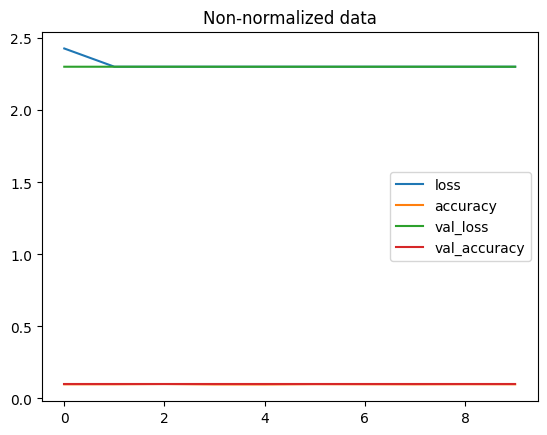

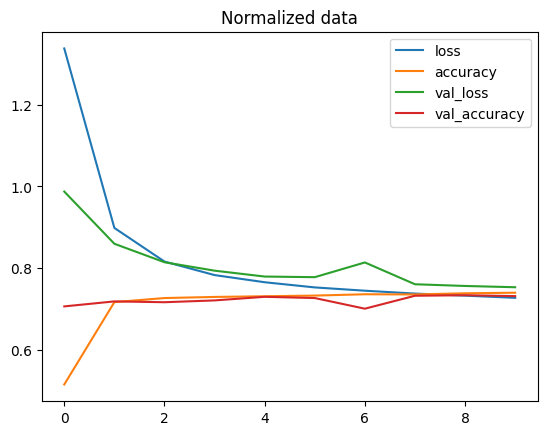

In [ ]:
#5. Visualize
import pandas as pd
#Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
#Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

**Note**: The same model with even slightly different data can procude datamatically different results. So when comparing models, it is important to make sure you are comparing then on the same criteria (e.g. same architecure but different data or dame ata but different architecture).

##Finding the ideal learning rate

In [ ]:
tf.random.set_seed(42)

#1. Create the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

#2. Compile the model
model_13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

# Create a learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
#3. Fit the model
find_lr_history=model_13.fit(train_data_norm,
                             train_labels,
                             epochs=40,
                             validation_data=(test_data_norm, test_labels),
                             callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 8s 4ms/step - loss: 1.3995 - accuracy: 0.4351 - val_loss: 1.0820 - val_accuracy: 0.5370 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9644 - accuracy: 0.6051 - val_loss: 0.8595 - val_accuracy: 0.6852 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7469 - accuracy: 0.7200 - val_loss: 0.7540 - val_accuracy: 0.7098 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6640 - accuracy: 0.7486 - val_loss: 0.6704 - val_accuracy: 0.7489 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6316 - accuracy: 0.7622 - val_loss: 0.6493 - val_accuracy: 0.7618 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6129 - accuracy: 0.7741 - val_loss: 0.6980 - val_accuracy: 0.7538 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the ideal learning rate')

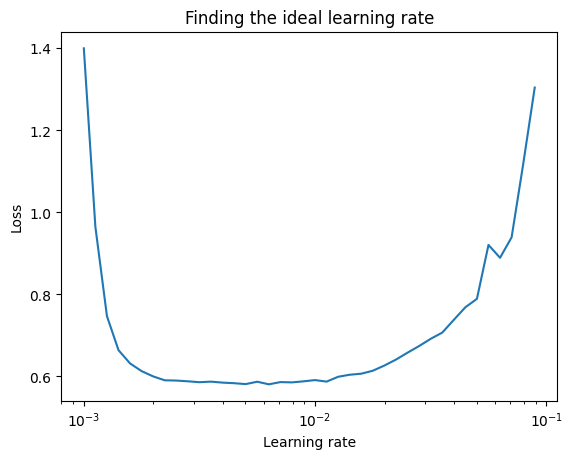

In [ ]:
#Plot the learning rate decay curve

import numpy as np
import matplotlib.pyplot as plt

lrs= 1e-3 *(10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
#Let's refit the model with ideal learning rate
tf.random.set_seed(42)

#1. Create the model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

#2. Compile the model
model_14.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics = ["accuracy"])

#3. Fit the model
model_14_history=model_14.fit(train_data_norm,
                             train_labels,
                             epochs=40,
                             validation_data=(test_data_norm, test_labels),
                             callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2581 - accuracy: 0.5427 - val_loss: 0.8839 - val_accuracy: 0.6625 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7710 - accuracy: 0.7173 - val_loss: 0.7111 - val_accuracy: 0.7496 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6456 - accuracy: 0.7661 - val_loss: 0.6928 - val_accuracy: 0.7538 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6102 - accuracy: 0.7806 - val_loss: 0.6258 - val_accuracy: 0.7797 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5983 - accuracy: 0.7832 - val_loss: 0.6414 - val_accuracy: 0.7729 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5890 - accuracy: 0.7874 - val_loss: 0.6401 - val_accuracy: 0.7748 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

##Evaluating multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results by training it for longer or changing the architecture
* Save and export it for use in application


In [ ]:
#Create confusion matrix

import itertools
from sklearn.metrics import confusion_matrix

#Adjust the plot_cofusion_matrix function from scikit-learn to use with tensorflow

def make_confusion_matrix(y_true, y_pred,classes=None, figsize=(10,10), text_size=15):

  #Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float")/cm.sum(axis=1)[:,np.newaxis] #normalize confusion matrix
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize = figsize)
  #Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  #Create classes
  #classes=False

  if classes:
    labels = classes
  else:
    labels= np.arange(cm.shape[0])

  #Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  #Set x-axis to the bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  #Set threshold for different colors
  threshold = (cm.max() + cm.min())/2.

  #Plot the texrt one ach cell
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
    plt.text(j,i, f"{cm[i,j]}({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j] > threshold else "black",
            size=text_size)



In [ ]:
#Make some predictions with our model
y_probs = model_14.predict(test_data_norm) #probs is short for "prediction probabilities"
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.94476237e-16, 0.00000000e+00, 3.26848921e-12, 2.44882127e-27,
        2.53607356e-14, 1.21715561e-01, 4.13276218e-14, 8.62384617e-01,
        2.41633586e-07, 1.58996172e-02],
       [1.20359905e-01, 4.83184345e-02, 1.47213921e-01, 1.72834069e-01,
        1.73195347e-01, 2.73731840e-03, 1.66022331e-01, 2.56427273e-04,
        1.69050366e-01, 1.18112666e-05],
       [3.94602027e-03, 8.68255019e-01, 2.78284028e-03, 1.14740126e-01,
        3.84045881e-03, 1.53350341e-03, 3.57622234e-03, 3.50458940e-05,
        1.29064918e-03, 2.81664079e-08],
       [3.94602027e-03, 8.68255019e-01, 2.78284028e-03, 1.14740126e-01,
        3.84045881e-03, 1.53350341e-03, 3.57622234e-03, 3.50458940e-05,
        1.29064918e-03, 2.81664079e-08],
       [1.20359905e-01, 4.83184345e-02, 1.47213921e-01, 1.72834069e-01,
        1.73195347e-01, 2.73731840e-03, 1.66022331e-01, 2.56427273e-04,
        1.69050366e-01, 1.18112666e-05]], dtype=float32)

In [ ]:
y_probs[0], tf.argmax(y_probs[0])

(array([5.7726554e-29, 2.2875102e-13, 0.0000000e+00, 2.0463182e-21,
        0.0000000e+00, 2.4574952e-01, 3.1515580e-35, 7.2241920e-01,
        4.0933883e-17, 3.1831339e-02], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=7>)

In [ ]:
class_names[tf.argmax(y_probs[0])]

'Sneaker'

In [ ]:
#Convert all of the prediction probablities into integers
y_preds=y_probs.argmax(axis=1)

#View the first 10 prediction labels
y_preds[:10]

array([7, 4, 1, 1, 4, 4, 4, 4, 7, 7])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[   0,    0,    0,    0,  999,    1,    0,    0,    0,    0],
       [   0,  684,    0,    2,  311,    3,    0,    0,    0,    0],
       [   0,    0,    0,    0,  999,    1,    0,    0,    0,    0],
       [   0,    6,    0,    1,  980,   12,    0,    1,    0,    0],
       [   0,    0,    0,    0,  999,    1,    0,    0,    0,    0],
       [   0,    0,    0,    0,    7,  610,    0,  383,    0,    0],
       [   0,    0,    0,    0, 1000,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,   31,    0,  969,    0,    0],
       [   0,    0,    0,    5,  931,   52,    0,   11,    1,    0],
       [   0,    0,    0,    0,    1,    5,    0,  989,    0,    5]])

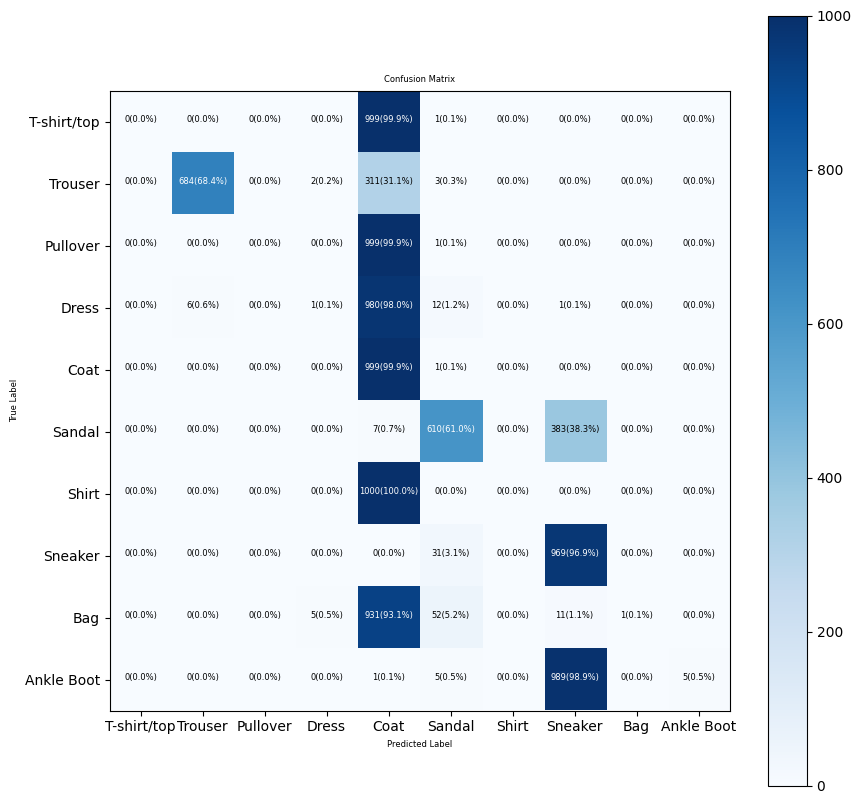

In [ ]:
make_confusion_matrix(y_true=test_labels,
                      y_pred = y_preds,
                      classes=class_names,
                      figsize=(10,10),
                      text_size=6)

**Note**: Often when working with images and other forms of visual data, it is a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your model.

How about we create a fun little function for:
* Plot a random image
* Make a prediction in said image
* Label the plot with the truth label & predicted label

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Plots a random image, its labels with prediction and truth label.
  """

  #Set upa random trigger
  i=random.randint(0,len(images))

  ##Create predictions and target
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  #Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  #Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color="green"
  else:
    color="red"

  #Add xlabel information
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)


1/1 [==============================] - 0s 19ms/step


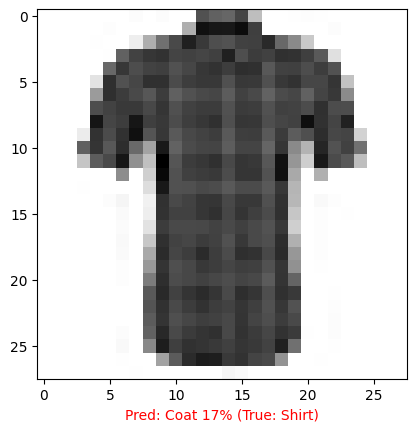

In [ ]:
plot_random_image(model=model_14,
                  images = test_data_norm,
                  true_labels = test_labels,
                  classes = class_names)

In [ ]:
#Find the layers of the most recent model
model_14.layers

In [ ]:
#Get the pattern of a layer in our network
weights, biases= model_14.layers[1].get_weights()

#Shapes
weights, weights.shape

(array([[ 10.962545 ,  -3.8304946,   6.168043 ,   7.0884347],
        [-24.039228 ,  10.947462 ,  17.648989 ,   8.708909 ],
        [-13.1635065,  -2.6140153,   6.928022 ,   1.8075521],
        ...,
        [-15.260937 ,  -3.4491298,  -4.4956856,   2.3309605],
        [-10.812959 ,   7.839541 ,  -7.955148 ,   8.608623 ],
        [ -9.099283 ,  -4.25631  ,  -6.423461 ,  -1.5978608]],
       dtype=float32),
 (784, 4))

In [ ]:
model_14.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_52 (Dense)            (None, 4)                 3140      
                                                                 
 dense_53 (Dense)            (None, 4)                 20        
                                                                 
 dense_54 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Bias and biases shapes
biases,biases.shape

(array([-19.402203,  20.766563,   5.74556 ,  -8.716367], dtype=float32), (4,))

The difference between the bias and weights matrix - the bias vector has one value per hidden unit, while the weight matrix has one value per data point.

Every neuron has a bias vector. Each of these is paired with a weights matrix. The bias vector gets initialized as zeros (at least in the case of tensorflow dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

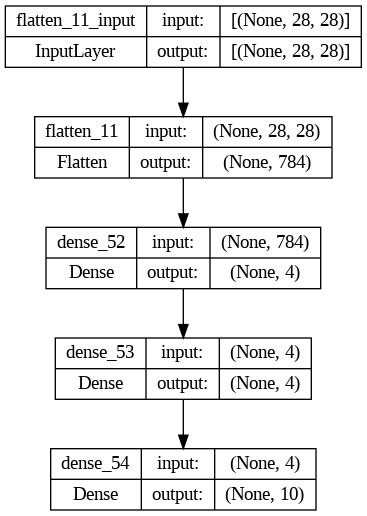

In [ ]:
#Let'scheckout another way of viewing our deep learning model
from tensorflow.keras.utils import plot_model
plot_model(model_14, show_shapes=True)